In [1]:
# Run this cell with Shift-Enter, and wait until the 
# asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Johnson Noise Analysis

## Exercise 1 -  Data reduction
### Read in the raw data


In [51]:
johnson_300 = pd.read_csv('Johnson300k.csv', header=None,)
johnson_300  


,0,1
0,40.00,0.007996
1,20.00,0.005797
2,15.00,0.005076
3,9.99,0.004169
4,7.50,0.003648
5,4.99,0.003008
6,2.50,0.002152
7,1.00,0.001456
8,0.00,0.000634


In [61]:
R300 = johnson_300.loc[0:9, 0]
R300

0    40.00
1    20.00
2    15.00
3     9.99
4     7.50
5     4.99
6     2.50
7     1.00
8     0.00
Name: 0, dtype: float64

In [60]:
V300 = johnson_300.loc[0:9, 1]
V300

0    0.007996
1    0.005797
2    0.005076
3    0.004169
4    0.003648
5    0.003008
6    0.002152
7    0.001456
8    0.000634
Name: 1, dtype: float64

### Plot the reduced data

Plot the data set of $V_{rms}$ vs $R$ to see what it looks like.

Below, I'll show how. Study the commands, change them, and see what happens.  Hint: study the sections in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) on Matplotlib. 

After you make the plot, always look to make sure your data set does not have any weird points. This is a good way to catch bad data and/or mistakes.

In [ ]:
# Set up plot defaults  This cell only needs to be executed once.
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 12.0 # Use 12 point font



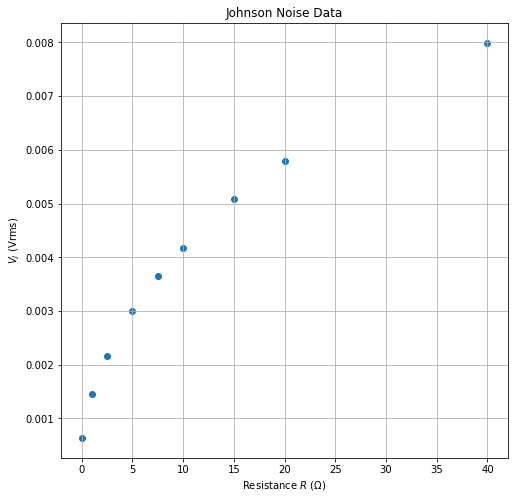

In [62]:
## Plot the data sets on one graph
## Header commands provided
fig, ax = plt.subplots(1, 1, figsize=(8,8))

plt.grid() # Turn on the grid
plt.title('Johnson Noise Data') # make a plot title
plt.ylabel(r'$V_J$ (Vrms)') # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)') #Another axis label

# Below shows how to make a plot with error bars.  The errors are multiplied by 
# 10 so that the bars are visible. 
ax.scatter(R300, V300)

# plt.legend(); # Make a legend

### Include the other data

Repeat the lines in the cell above and include another data set so that both the 395K and 77K data are on the same plot.

In [67]:
johnson_77 = pd.read_csv('Johnson77k.csv', header=None)
R77 = johnson_77.loc[0:9, 0]
V77 = johnson_77.loc[0:9, 1]

,0,1
0,40.00,0.004307
1,20.00,0.003090
2,15.00,0.002710
3,9.99,0.002244
4,7.50,0.001964
5,4.99,0.001660
6,2.50,0.001225
7,1.00,0.000929
8,0.00,0.000628


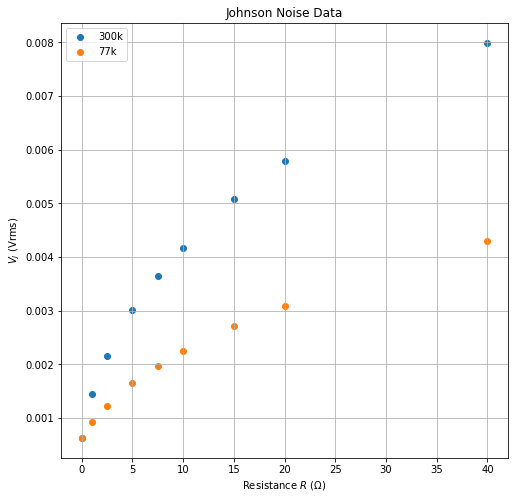

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
plt.grid() # Turn on the grid
plt.title('Johnson Noise Data') # make a plot title
plt.ylabel(r'$V_J$ (Vrms)') # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)') #Another axis label

# Below shows how to make a plot with error bars.  The errors are multiplied by 
# 10 so that the bars are visible. 
ax.scatter(R300, V300)
ax.scatter(R77, V77)
ax.legend(["300k", "77k"])

## Exercise 2
### Part a.  Modify the data

Modify the data arrays to obtain the mean square voltages for each temperature, and also the difference in the (squared) data for the two temperatures, which will help remove the effects of noise in the electronics.  **Remember:** You have NumPy/Pandas arrays, so you can do each task with a single line of code.

Then plot the results, all on one plot so you can compare them visually.

#### For data sets that have uncertainties associated with them. 

If you have uncertainties on each data point that you want to carry forward in the analysis, when you square the value, the uncertainty is NOT also squared. Instead it is multiplied by 2 times the |value|.  That is, if $\sigma_x$ is the uncertainty in $x$, the uncertainty in $x^2$ is $\sigma_{x^2} = 2|x|\sigma_x$. 

Another way to work out the uncertainties is to first build arrays of uncertainty objects from the data and uncertainty arrays. For example, if the data are in an array called `X` and the uncertainty (i.e., error bars) are in an array called `sigma_X`, you can build an uncertainty array as follows:

    # Import uNumPy functions.  You could do this in the first cell
    import uncertainties.unumpy as unp
    
    # Build an uncertainty array
    uX = unp.uarray(X, sigma_X)
    
    # Square the array, and also propagate uncertainty
    uX_sqrd = uX*uX
    
    # Access the parts of the uncertainty array.  This is necessary for curve fitting
    uX_sqrd_values = unp.nominal_values(uX_sqrd)
    uX_sqrd_sigmas = unp.std_devs(uX_sqrd)

In [84]:
## Modify the arrays as specified above
V300_squared = V300**2
V77_squared = V77**2

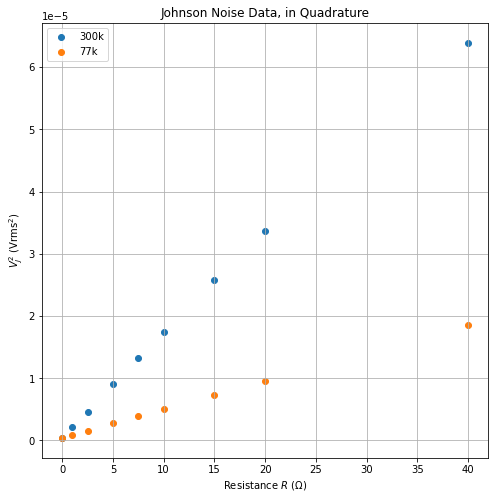

In [86]:
## Plot the results
## Header commands provided to format plot
fig, ax = plt.subplots(1,1, figsize = (8,8))

plt.grid()
plt.title('Johnson Noise Data, in Quadrature')
plt.ylabel(r'$V^2_J$ (Vrms$^2$)')
plt.xlabel(r'Resistance $R$ ($\Omega$)')

plt.scatter(R300, V300_squared)
plt.scatter(R77, V77_squared)

plt.legend(["300k", "77k"]);

### Part b. Fit the modified data

To fit the data set to a line, make use of the **LMFit** package. It is a useful add-on to the SciPy fitting functions.  This package simplifies fitting data to a variety of standard functions.  See the [Lmfit Documentation](https://lmfit.github.io/lmfit-py/index.html) for a full discussion.  The package is quite powerful, but for basic fitting with common functions, it is very easy to use.  


### 77 K data
Repeat the process for the 77K data set.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 2.6700e-14
    reduced chi-square = 3.8143e-15
    Akaike info crit   = -297.062074
    Bayesian info crit = -296.667625
    R-squared          = 0.99989890
[[Variables]]
    slope:      4.5417e-07 +/- 1.7261e-09 (0.38%) (init = 4.541652e-07)
    intercept:  4.4308e-07 +/- 2.8265e-08 (6.38%) (init = 4.430841e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.6852


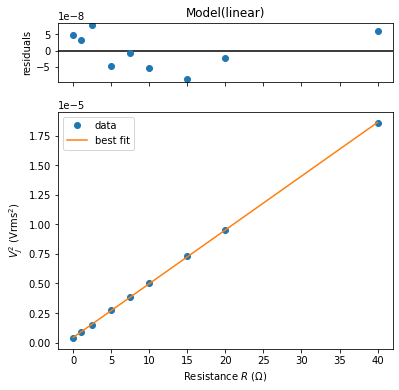

In [126]:
# imports a linear fitting model from lmfit  
# ONLY IMPORT ONCE IN A NOTEBOOK
from lmfit.models import LinearModel

# create an instance of the model
# You only need to do this once in a notebook
line = LinearModel()

# One must have a guess of the parameters. The guess() method works with most of the standard
# lmfit models

# The return value is a Parameters structure.  See the documentation.
param_guess = line.guess(V77_squared, x=R77)

# The line below executes the fitting process.  The results are returned to "line_fit"
line_fit = line.fit(V77_squared, param_guess, x=R77)

# This prints the results in an easy to read form
print(line_fit.fit_report())

#Then you can plot the results quickly just to see how it looks using the plot() method
line_fit.plot()
# Optional: Change axis labels from default 'X' vs. 'Y'.
plt.xlabel(r'Resistance $R$ ($\Omega$)')
plt.ylabel(r'$V^2_J$ (Vrms$^2$)');


And finally, the difference data

0    1.360872e-05
1    7.327849e-06
2    5.597956e-06
3    3.705625e-06
4    2.835856e-06
5    1.817104e-06
6    8.593290e-07
7    2.772023e-07
8    3.600000e-11
Name: 1, dtype: float64
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 3.8206e-13
    reduced chi-square = 5.4579e-14
    Akaike info crit   = -273.113926
    Bayesian info crit = -272.719477
    R-squared          = 0.99748458
[[Variables]]
    slope:      3.4401e-07 +/- 6.5294e-09 (1.90%) (init = 3.4401e-07)
    intercept:  1.4351e-07 +/- 1.0692e-07 (74.50%) (init = 1.435056e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.6852


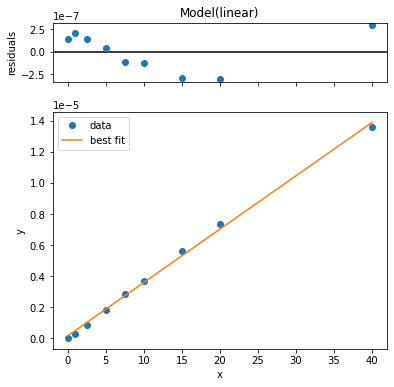

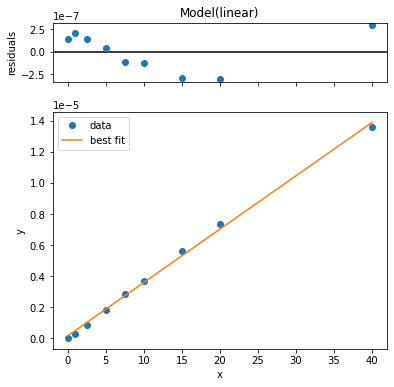

In [127]:
V_diff = V300 - V77
V_diff_squared = diff ** 2
print (V_diff_squared)

line = LinearModel()
param_guess = line.guess(V_diff_squared, x=R77)
line_fit = line.fit(V_diff_squared, param_guess, x=R77)
print(line_fit.fit_report())
line_fit.plot()

### Plot everything on one graph

Make a single plot that shows all three sets of data (as points) and the three fit lines (as lines).  Include a legend.

The cell below shows how to create a fit line using an arbitrary set of x-values based on the range of x data.  It uses the example data sets.

In [ ]:
## Create a "fit line" based on the obtained fit parameters

xvalues = np.linspace(position.min(),position.max(),100) # create a set of 100 evenly-spaced points
yvalues = line.eval(example_fit_params, x=xvalues) # The first argument to eval() needs to be the fit parameters object.

OK, it is your turn.

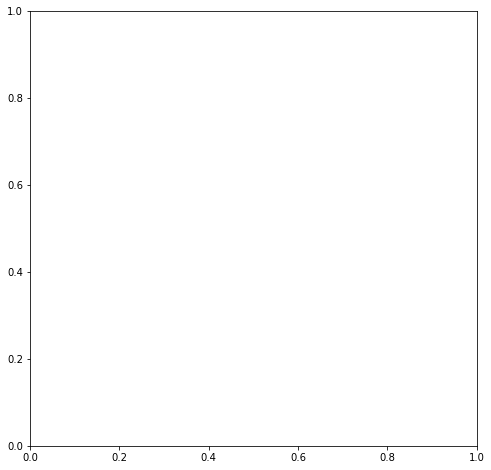

In [100]:
## Make single a plot of all data and fit lines
fig, ax = plt.subplots(1,1, figsize=(8,8))


### Part c.

Summary of results for Boltsmann constant:

In [10]:
## Summarize the results in one table
## Like so:
## print('  T (K)  |  k_B (J/K)   ')
## print('---------|--------------------')
## print('   295   | {:.1uP}'.format(k_295))
## print('    77   | {:.1uP}'.format(k_77))
## print(' 295-77  | {:.1uP}'.format(k_218))
## print('Accepted | {:10.4g}'.format(k_B))


## Exercise 3: Noise Figure

Calculate the "noise figure" for the low-noise amp, as described in the instructions.

The noise figure is defined:

$$ NF = 20\log_{10}\frac{V_{rms}(R)}{G\times\sqrt{4k_BTRB}} \; \text{dB}$$

Please limit the noise figure to 2 digits beyond the decimal point.  

Note: It clearly does not work for $R=0$.  You will need to leave this out of the calculation

In [111]:
## Calculate the Noise figure for the various values of R at 
## room temperature and display it as a table or a plot

## Make a data frame to display

N = np.zeros(8)
for x in range(8):
    N[x] = 20 * np.log10(V300[x]  / (10000 * np.sqrt(4 * 1.38e-23 * 300 * R300[x] * 10))) 
np.around(N, decimals=2)

array([49.85, 50.06, 50.16, 50.21, 50.3 , 50.39, 50.49, 51.07])

## Shot Noise Analysis

This is very similar to the Johnson noise analysis.

### Read in the data

For data structure type "1", column names like "0.1202mA" need to split at `m` to convert the current labels into currents.

In [119]:
## Read in the shot noise data and display it
shot = pd.read_csv('Shot.csv', header=None)
print(shot)

current = shot.loc[0:15, 0]
print(current)

voltage = shot.loc[0:15, 1]
print(voltage)

       0         1
0   0.00  0.004664
1   0.01  0.007352
2   0.02  0.009275
3   0.03  0.010880
4   0.04  0.012450
5   0.05  0.013200
6   0.06  0.014370
7   0.07  0.015760
8   0.08  0.016390
9   0.09  0.017540
10  0.10  0.018700
11  0.11  0.019660
12  0.12  0.020300
13  0.13  0.021140
14  0.14  0.021690
15  0.15  0.021970
0     0.00
1     0.01
2     0.02
3     0.03
4     0.04
5     0.05
6     0.06
7     0.07
8     0.08
9     0.09
10    0.10
11    0.11
12    0.12
13    0.13
14    0.14
15    0.15
Name: 0, dtype: float64
0     0.004664
1     0.007352
2     0.009275
3     0.010880
4     0.012450
5     0.013200
6     0.014370
7     0.015760
8     0.016390
9     0.017540
10    0.018700
11    0.019660
12    0.020300
13    0.021140
14    0.021690
15    0.021970
Name: 1, dtype: float64


### Plot the raw data

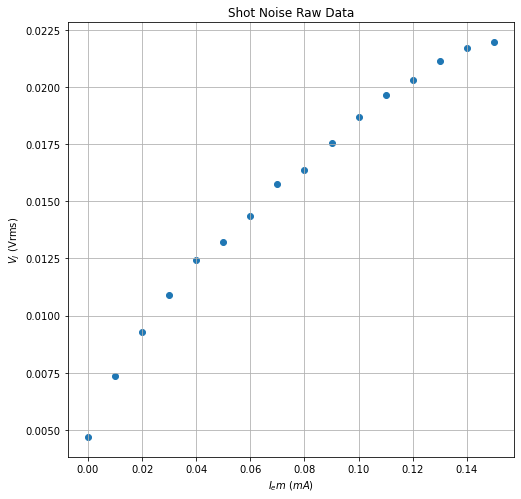

In [125]:
## Plot it
fig, ax = plt.subplots(1,1,figsize=(8,8))

plt.grid()
plt.title('Shot Noise Raw Data')
plt.xlabel('$I_em$ $(mA)$')
plt.ylabel(r'$V_J$ (Vrms)')

plt.scatter(current, voltage)
                       

### Calculate $V^2_{rms}$

In [124]:
## transform the data, like you did with Johnson noise

voltage_squared = voltage ** 2


### Then fit it and plot it

**Note:** Shot nose data may not be "pure" in that you will see a notable deviation from the expected behavior.  The data may be affected by $1/f$ noise in the vacuum diode that gets worse with higher emission current.   This effect is reduced in the newer shot noise apparatus that uses a different vacuum diode.  If you see a notable curve in your measured voltage, you may try a couple of work-arounds to obtain the linear part of the noise-squared vs emission current:

1. Select a portion of the data to fit, where the $1/f$ problem is less, near the low-emission current end of the data set.
2. Make a ploynomial fit and look at the linear term.

You should try a couple of options and compare your results with your partners.  You only need to do this if you see the $1/f$ effect.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 16
    # variables        = 2
    chi-square         = 9.4558e-10
    reduced chi-square = 6.7542e-11
    Akaike info crit   = -372.828918
    Bayesian info crit = -371.283741
    R-squared          = 0.99729185
[[Variables]]
    slope:      0.00320026 +/- 4.4570e-05 (1.39%) (init = 0.003200263)
    intercept:  2.1789e-05 +/- 3.9237e-06 (18.01%) (init = 2.178888e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8519


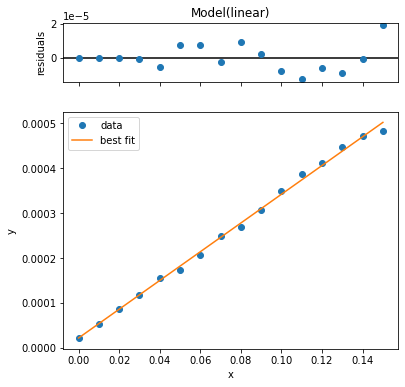

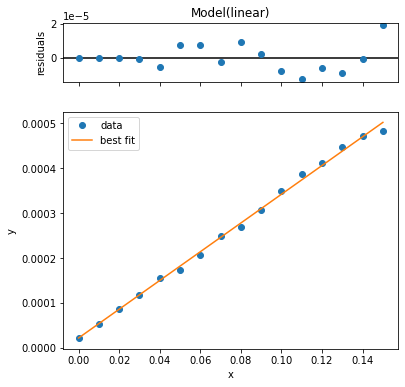

In [128]:
## First the fit. Try the whole data set first.
line = LinearModel()
param_guess = line.guess(voltage_squared, x=current)
line_fit = line.fit(voltage_squared, param_guess, x=current)
print(line_fit.fit_report())
line_fit.plot()

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 4
    # variables        = 2
    chi-square         = 2.5143e-14
    reduced chi-square = 1.2572e-14
    Akaike info crit   = -126.801955
    Bayesian info crit = -128.029366
    R-squared          = 0.99999515
[[Variables]]
    slope:      0.00321838 +/- 5.0143e-06 (0.16%) (init = 0.003218382)
    intercept:  2.1775e-05 +/- 9.3809e-08 (0.43%) (init = 2.177547e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8018


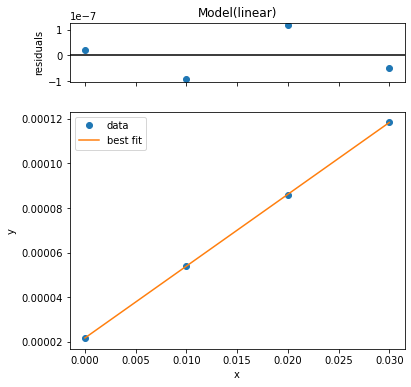

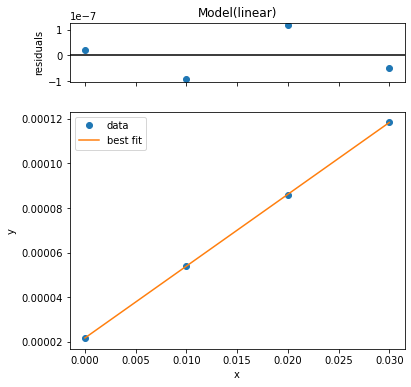

In [130]:
## Then try the lower half of the data, before the 1/f takes over, if necessary
lower = voltage_squared.loc[0:3]
line = LinearModel()
param_guess = line.guess(lower, x=current.loc[0:3])
line_fit = line.fit(lower, param_guess, x=current.loc[0:3])
print(line_fit.fit_report())
line_fit.plot()


Optional: Another way out of the $1/f$ problem is to fit a quadratic, and use the linear-term coefficient as the initial slope.

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 16
    # variables        = 3
    chi-square         = 9.1427e-10
    reduced chi-square = 7.0328e-11
    Akaike info crit   = -371.367746
    Bayesian info crit = -369.049980
    R-squared          = 0.99738154
[[Variables]]
    a: -7.4041e-04 +/- 0.00110961 (149.86%) (init = -0.0007404141)
    b:  0.00331133 +/- 1.7254e-04 (5.21%) (init = 0.003311325)
    c:  1.9197e-05 +/- 5.5779e-06 (29.06%) (init = 1.919743e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9646
    C(b, c) = -0.8328
    C(a, c) = +0.6963


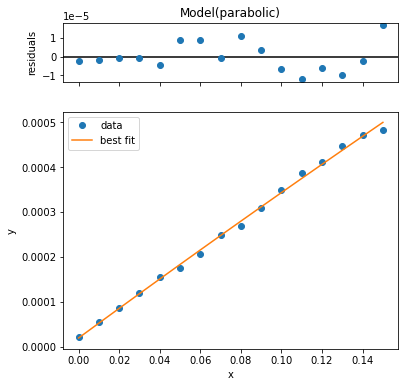

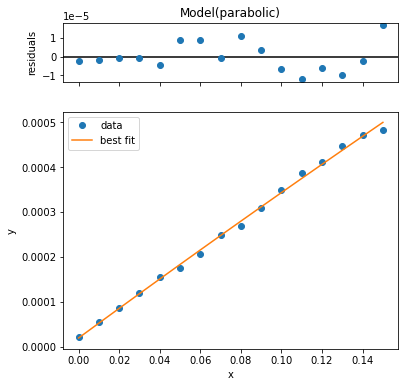

In [131]:
## To do this, you need a different fitting model
#  Below will get you started, but you need to study the docs to understand the parameters.

from lmfit.models import QuadraticModel
quadratic = QuadraticModel()

param_guess = quadratic.guess(voltage_squared, x=current)
line_fit = quadratic.fit(voltage_squared, param_guess, x=current)
print(line_fit.fit_report())
line_fit.plot()

In [17]:
## Now make a nice plot of all fits over the data points


### Calculate Electron Charge

Use the fit results, propagate the uncertainty, and find a value for $e$.

 \begin{equation}
        I_{shot}=\sqrt{2e\bar{I}B}
        \end{equation}
  \begin{equation}
        e=\frac{I_{shot}^2}{2\bar{I}B}
        \end{equation}       
        

In [ ]:
## Calculate e with uncertainty and print it (with units) 
## Compare with the accepted value

# You will need the correct sensing resistance in the shot noise box:
# Older box:
# R_load = unc.ufloat(4976,1) # Load resistance of shot noise box in ohms 
# Newer box:
# R_load = unc.ufloat(10000.0,10)

# Calculate the result, and propagate the uncertainty.

# Use whatever you need below
# print('\nElectron charge from whole data set = {:.2uP} C'.format(e_1))
# print('Electron charge from partial data set = {:.2uP} C'.format(e_2))
# print('Electron charge from quadratic fit = {:.2uP} C'.format(e_3))
# print('\nAccepted value = {:.4g} C'.format(const.e))